In [1]:
import numpy as np
import os
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from sklearn.metrics import confusion_matrix, classification_report

from tqdm.notebook import tqdm

In [ ]:
tf.__version__

In [ ]:
keras.__version__

In [ ]:
n_epochs = 30

In [2]:
digits_mnist = keras.datasets.mnist

In [3]:
(train_X, train_y), (test_X, test_y) = digits_mnist.load_data()

In [4]:
test_y[:3]

array([7, 2, 1], dtype=uint8)

In [5]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (train_X.shape, train_y.shape))
print('Test: X=%s, y=%s' % (test_X.shape, test_y.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [6]:
test_y[:3]

array([7, 2, 1], dtype=uint8)

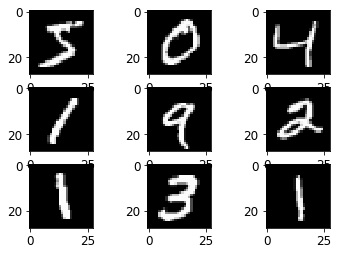

In [7]:
# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(train_X[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [8]:
# reshape dataset to have a single channel
train_X = train_X.reshape((train_X.shape[0], 28, 28, 1))
test_X = test_X.reshape((test_X.shape[0], 28, 28, 1))

In [10]:
# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    
    return train_norm, test_norm

In [11]:
# prepare pixel data
train_X, test_X = prep_pixels(train_X, test_X)

In [12]:
train_X.shape

(60000, 28, 28, 1)

In [13]:
test_X.shape

(10000, 28, 28, 1)

In [14]:
keras.backend.clear_session()

In [15]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

In [16]:
model.layers

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               540900    
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

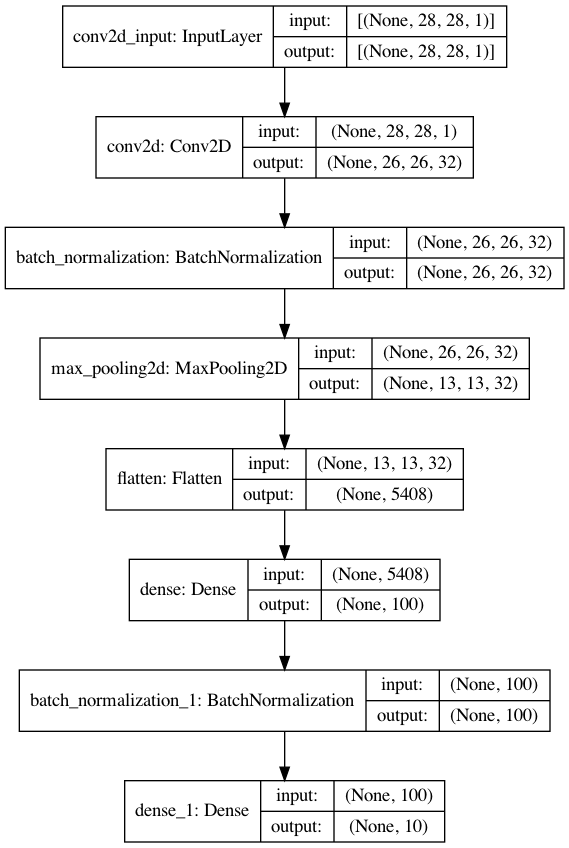

In [18]:
keras.utils.plot_model(model, "model_arch_fashion_mnist_01_simple.png", show_shapes=True)

In [19]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [20]:
history = model.fit(train_X, train_y, epochs=n_epochs, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.1969 - accuracy: 0.9440 - val_loss: 0.0956 - val_accuracy: 0.9737
Epoch 2/10
1500/1500 [==============================] - 17s 12ms/step - loss: 0.0808 - accuracy: 0.9785 - val_loss: 0.0715 - val_accuracy: 0.9796
Epoch 3/10
1500/1500 [==============================] - 17s 12ms/step - loss: 0.0564 - accuracy: 0.9850 - val_loss: 0.0661 - val_accuracy: 0.9808
Epoch 4/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0414 - accuracy: 0.9898 - val_loss: 0.0574 - val_accuracy: 0.9831
Epoch 5/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0315 - accuracy: 0.9930 - val_loss: 0.0557 - val_accuracy: 0.9837
Epoch 6/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0250 - accuracy: 0.9945 - val_loss: 0.0551 - val_accuracy: 0.9833
Epoch 7/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0206 - accuracy: 0.9959 - val_loss: 0.0524 -

In [21]:
# evaluate model on test dataset
loss, acc = model.evaluate(test_X, test_y, verbose=1)
print('> %.3f' % (acc * 100.0))

313/313 [==============================] - 1s 3ms/step - loss: 0.0470 - accuracy: 0.9860
> 98.600


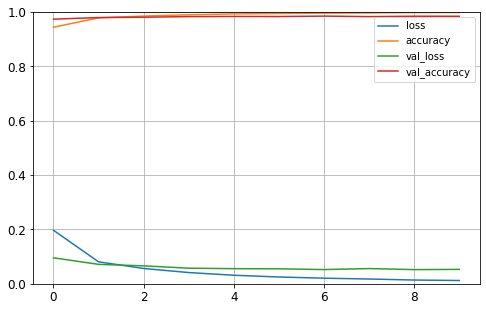

In [22]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [23]:
predictions = np.argmax(model.predict(test_X, verbose=1), axis=-1)

313/313 [==============================] - 1s 3ms/step


In [24]:
predictions.shape

(10000,)

In [25]:
predictions[:3]

array([7, 2, 1])

In [26]:
print(confusion_matrix(test_y, predictions))

[[ 975    0    2    0    0    0    1    1    1    0]
 [   0 1131    3    0    0    0    1    0    0    0]
 [   1    3 1013    2    1    0    1    6    5    0]
 [   0    0    2 1001    0    3    0    2    2    0]
 [   0    0    1    0  973    0    1    0    2    5]
 [   2    0    1    8    0  877    3    0    1    0]
 [   7    2    0    2    2    2  942    0    1    0]
 [   1    0    7    1    0    0    0 1018    0    1]
 [   4    1    3    2    1    1    2    4  953    3]
 [   2    3    1    4    7    2    0   11    2  977]]


In [27]:
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



# Batch Normalization

**The right ways to use batch normalization for the convolutional and dense layers.**

Theory:
* the Batch Normalization Layer is actually inserted right after a Conv Layer/Fully Connected Layer, but before feeding into ReLu (or any other kinds of) activation. 

* In the [Ioffe and Szegedy 2015](https://arxiv.org/pdf/1502.03167.pdf), the authors state that "we would like to ensure that for any parameter values, the network always produces activations with the desired distribution". So the Batch Normalization Layer is actually inserted right after a Conv Layer/Fully Connected Layer, but before feeding into ReLu (or any other kinds of) activation. See this [video](https://www.youtube.com/watch?v=jhUZ800C650&list=PLLvH2FwAQhnpj1WEB-jHmPuUeQ8mX-XXG&index=6) at around time 53 min for more details. As far as dropout goes, I believe dropout is applied after the activation layer. In the [dropout paper](https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf) figure, 3b, the dropout factor/probability matrix r(l) for hidden layer l is applied to it on y(l), where y(l) is the result after applying activation function f. So in summary, the order of using batch normalization and dropout is: -> CONV/FC -> BatchNorm -> ReLu(or other activation) -> Dropout -> CONV/FC

An example:

```
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))
```


In [28]:
keras.backend.clear_session()

In [29]:
model = Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [30]:
model.layers

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0

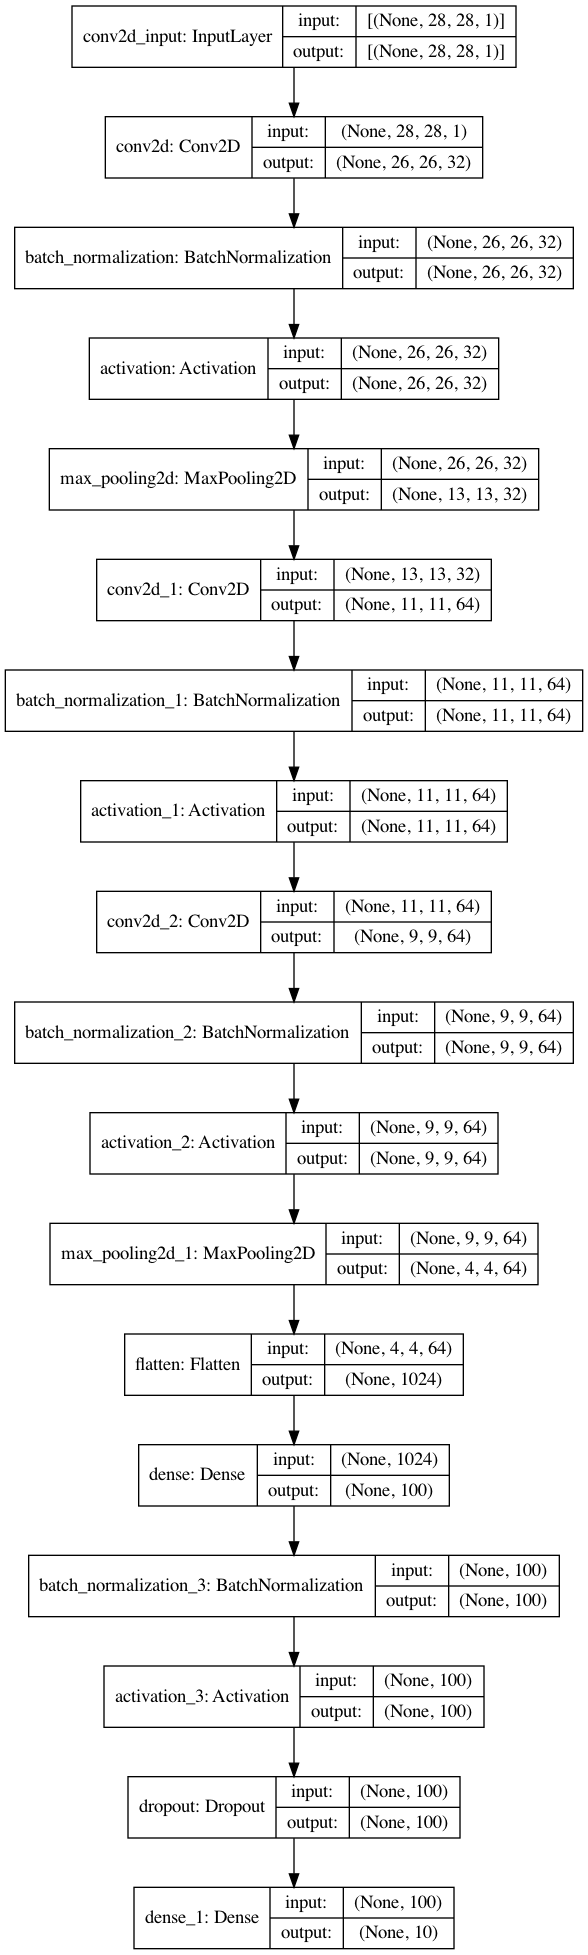

In [32]:
keras.utils.plot_model(model, "model_arch_fashion_mnist_02_deep.png", show_shapes=True)

In [33]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [34]:
history = model.fit(train_X, train_y, epochs=n_epochs, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 46s 30ms/step - loss: 0.4092 - accuracy: 0.8855 - val_loss: 0.1011 - val_accuracy: 0.9743
Epoch 2/10
1500/1500 [==============================] - 48s 32ms/step - loss: 0.1685 - accuracy: 0.9554 - val_loss: 0.0688 - val_accuracy: 0.9810
Epoch 3/10
1500/1500 [==============================] - 45s 30ms/step - loss: 0.1264 - accuracy: 0.9668 - val_loss: 0.0554 - val_accuracy: 0.9837
Epoch 4/10
1500/1500 [==============================] - 45s 30ms/step - loss: 0.1041 - accuracy: 0.9720 - val_loss: 0.0482 - val_accuracy: 0.9858
Epoch 5/10
1500/1500 [==============================] - 45s 30ms/step - loss: 0.0906 - accuracy: 0.9752 - val_loss: 0.0422 - val_accuracy: 0.9878
Epoch 6/10
1500/1500 [==============================] - 46s 31ms/step - loss: 0.0778 - accuracy: 0.9786 - val_loss: 0.0405 - val_accuracy: 0.9885
Epoch 7/10
1500/1500 [==============================] - 46s 30ms/step - loss: 0.0716 - accuracy: 0.9801 - val_loss: 0.0386 -

In [35]:
# evaluate model on test dataset
loss, acc = model.evaluate(test_X, test_y, verbose=1)
print('> %.3f' % (acc * 100.0))

313/313 [==============================] - 3s 8ms/step - loss: 0.0297 - accuracy: 0.9903
> 99.030


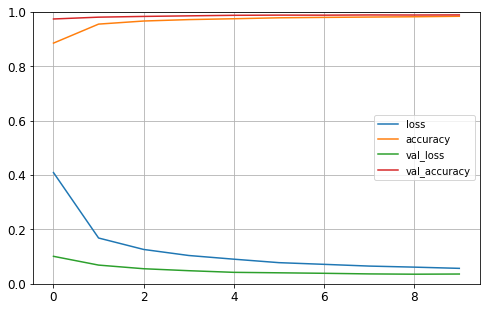

In [36]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [37]:
predictions = np.argmax(model.predict(test_X, verbose=1), axis=-1)

313/313 [==============================] - 3s 8ms/step


In [38]:
predictions.shape

(10000,)

In [39]:
predictions[:3]

array([7, 2, 1])

In [40]:
print(confusion_matrix(test_y, predictions))

[[ 975    0    1    0    1    0    2    1    0    0]
 [   0 1134    1    0    0    0    0    0    0    0]
 [   2    1 1026    1    0    0    0    2    0    0]
 [   0    0    1 1003    0    2    0    2    2    0]
 [   1    0    0    0  970    0    1    1    1    8]
 [   1    0    0    9    0  877    2    1    1    1]
 [   4    3    0    0    1    1  948    0    1    0]
 [   0    4    2    2    0    0    0 1019    0    1]
 [   2    0    1    1    2    1    0    1  964    2]
 [   3    1    0    2    2    5    1    6    2  987]]


In [41]:
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



# Monte Carlo Dropout

In [42]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [43]:
mc_model = keras.models.Sequential([
    MCDropout(layer.rate) if isinstance(layer, keras.layers.Dropout) else layer
    for layer in model.layers
])

In [44]:
mc_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)       

In [45]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [46]:
mc_model.set_weights(model.get_weights())

In [62]:
y_probas = np.stack([model(test_X) for sample in tqdm(range(100))])

In [63]:
y_probas.shape

(100, 10000, 10)

In [64]:
np.round(y_probas[:10, :1], 2)

array([[[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]]], dtype=float32)

In [65]:
y_proba = y_probas.mean(axis=0)

In [77]:
np.round(model.predict(test_X[15:16]), 2)

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [76]:
np.round(np.mean([mc_model.predict(test_X[15:16]) for sample in tqdm(range(100))], axis=0), 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [78]:
test_y[15:16]

array([5], dtype=uint8)

In [79]:
y_std = y_probas.std(axis=0)

In [83]:
np.round(y_std[15:16], 2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)